# Maximum Likelihood (ML) and Maximum a Posteriori (MAP)
Suppose you are given a dataset $D=\{(x_i,y_i)\}_{i=1}^N$, where $x_i\in R\; \forall i=1,\dots,N$, and $y_i\in R\; \forall i=1,\dots,N$. Moreover, suppose that: $$ $$
$$y_i=w_0+w_1x_i+\dots+w_nx_i^n+\mathcal{n}_i\qquad\forall i=1,\dots,N\qquad(1)$$ $$ $$
Where $\mathcal{n}_i\sim\mathcal{N}(0;\sigma^2)$ is random Gaussian Noise and $w=(w_1,\dots,w_n)^T=(1,\dots,1)^T$. It is known that the Maximum Likelihood (ML) approach works by defining the conditional probability of observing $D$ given $w$,$p(D|w)$ and then optimizes the parameters $w$ to maximize this probability distribution over $D$. Moreover, it is also known that this approach can be made equivalent to the deterministic approach to solve such problems (the Least Square method) by taking the negative-log of $p(D|w)$. Indeed, by assuming that the noise $\mathcal{n}_i$ is Gaussian for each $i=1,\dots,N$, it is easy to show that $$ $$
$$p((x,y)|w)=\mathcal{N}(w_0+w_1x+\dots+w_nx^n;\sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2\sigma^2}(w_0+w_1x+\dots+w_nx^n-y)^2}$$ $$ $$
Thus $$ $$
$$p(D|w)=\prod_{i=1}^Np((x_i,y_i)|w)\Longleftrightarrow w^*=arg\underset{w}{\operatorname{max}}p(D|w)=arg\underset{w}{\operatorname{min}}-log\;p(D|w)=arg\underset{w}{\operatorname{min}}-log\prod_{i=1}^Np((x_i,y_i)|w)=\\arg\underset{w}{\operatorname{min}}\sum_{i=1}^N\frac{1}{2\sigma^2}(w_0+w_1x_i+\dots+w_nx_i^n-y_i)^2=arg\underset{w}{\operatorname{min}}\frac{1}{2}\|Xw-y\|_2^2$$ $$ $$
Where $X$ is the $N×(n+1)$ matrix that contains the powers from $0$ to $n$ of the input datapoints $x_i$ as rows (the Vandermonde matrix associated with $(x_1,\dots,x_N)^T$),$w=(w_0,\dots,w_n)^T$ and $y=(y_1,\dots,y_N)^T$. $$ $$
Note that the above equation is equivalent to the function you optimized in the Exercise 3 of Lab3 with
GD, with $A:=X$,$x:=w$ and $b:=y$. $$ $$
Unfortunately, when the problem is ill-conditioned, it is usually difficult to optimize due to algorithmic instabilities. When this happens, it is usual to use the Maximum A Posteriori approach, that insert additional prior information about the distribution of the weights $w$ to the probabilistic model to improve the obtained results. $$ $$
To show how it works, suppose that we know that the weights are normally distributed $w\sim\mathcal{N}(0;\frac{1}{\lambda}I)$ where $\lambda$ (usually called *Regularization Parameter*) is an unknown parameter that the user needs to define.
Then we can use the Bayes Theorem to express the A Posteriori probability of $w$ given $D$ as $$ $$
$$p(w|D)=\frac{p(D|w)p(w)}{p(D)}$$ $$ $$
The MAP solution searches for a set of weights $w$ that maximize $p(w|D)$. Following the same reasoning as before, $$ $$
$$w^*=arg\underset{w}{\operatorname{max}}p(w|D)=arg\underset{w}{\operatorname{min}}-log\;p(D|w)-log\;p(w)=arg\underset{w}{\operatorname{min}}\sum_{i=1}^N-log\;p((x_i,y_i)|w)-log\;p(w)$$ $$ $$
- *(On Paper)* Complete the computation above and obtain the formulation for the optimization problem that gives the MAP solution under the hypothesis above. *Notice that the first term of the MAP formulation is the same as the ML formulation*.
***
$$ 
$$ $$w^*=arg\underset{w}{\operatorname{min}}\sum_{i=1}^N-log\;p((x_i,y_i)|w)-log\;p(w)=arg\underset{w}{\operatorname{min}}\frac{1}{2}\|Xw-y\|_2^2+\frac{1}{2}\left(w-0\right)^T\left(\frac{1}{\lambda}I\right)^{-1}\left(w-0\right)=\\arg\underset{w}{\operatorname{min}}\frac{1}{2}\|Xw-y\|_2^2+\frac{\lambda}{2}\|w\|_2^2$$ $$ $$
***

- Is this optimization problem equivalent to a problem you already solved in the past Lab session? Comment. $$ $$
***

    This optimization is equivalent to the function optimized in the exercise 4 of LAB 3 with GD, with $A:=X, x:=w and b:=y$

*** 
$\newline$
Given the two optimization problem above, we will implement a program that compare the two solution, that we will refer to as $w_{ML}$ and $w_{MAP}$. $$ $$

1. **Creation of the Dataset:** We want to create a script to test the behavior of the Maximum Likelihood and the Maximum a Posteriori solutions for the polynomial regression problem. $$ $$
    - After you fixed two integers $n$ and $N$, that represent the degree of the polynomial that describes the model and the number of samples, respectively, define the input data as the array of $N$ equispaced values bewteen 0 and 1, and call it $x$.
    - Write a function **vander** that takes as input an array $x$ and an integer $n$ and gives as output the $(n+1)×N$ Vandermonde matrix, which is defined as $$ $$ $$ V = \left(\begin{array}{cccc} 1 & x_1 & \dots & x_1^n\\ 1 & x_2 & \dots & x_2^n\\ \vdots & \vdots & \dots & \vdots \\ 1 & x_N & \dots & x_N^n\end{array}\right)$$ $$ $$ and use it to compute the Vandermonde matrix associated with $x$, **X = vander(x,n)** $$ $$
    - Define an *(n+1)*-dimensional array $w_{true}=(1,1,\dots,1)^T$ and compute the output data $y_i=\sum_{j=0}^nw_jx_i^j$ (make use of the Vandermonde matrix defined in the point above to simplify the computation). Let $y=(y_1,\dots,y_N)^T$ the vector of the output data.$$ $$
    - Compute a noisy version of the output data $\tilde{y}_i=y_i+\mathcal{n}_i$ where $\mathcal{n}\sim\mathcal{N}(0;\sigma)$ and $\sigma=0.1$. *I suggest to fix a seed with the function **np.random.seed** to obtain always the same results*.$$ $$
    We have thus defined the dataset $D=\{(x_i,\tilde{y}_i)\}_{i=1}^N$. $$ $$
    
2. **Maximum Likelihood (ML) Estimation:** We now want to use the dataset defined above to write a script that uses the Gradient Descent Algorithm to find the Maximum Likelihood solution for $w$. $$ $$
    - Suppose you don't know the true degree $n$ as it is usual in the applications, define a fixed value of $\tilde{n}$ and compute the Vandermonde matrix $\tilde{X}$ of degree $\tilde{n}$ associated with $x$. *Use the function defined above to build the Vandermonde matrix*.$$ $$
    - Define the functions **f** and **grad_f** that represents the Maximum Likelihood solution for your problem.$$ $$
    - Use the Gradient Descent algorithm with carefully chosen values for the parameters (**kmax** can be extremely large due to ill-conditioning of the Vandermonde matrix) to find $w_{ML}$. $$ $$

***

This is like supposing that we don't know the parameters of some polynomials (each row is a poly and w are its parameters)

***

3. **Maximum a Posteriori:** And now, to compute the MAP solution $w_{MAP}$, under the assumption $p(x)=\mathcal{N}(0,I)$. $$ $$
    - With the same value for $\tilde{n}$ as before, compute the Vandermonde matrix $\tilde{X}$ of degree $\tilde{n}$ associated with $x$. $$ $$
    - Define the functions **f** and **grad_f** that represents the Maximum a Posteriori solution for your problem. $$ $$
    - Use the Gradient Descent algorithm with carefully chosen values for the parameters (**kmax** can be extremely large due to ill-conditioning of the Vandermonde matrix) to find $w_{MAP}$. $$ $$
    
4. **Test:** Finally, we want to test the scripts defined above to check the differences between the two solutions. $$ $$
    - Use the function **plt.plot(x, y, 'o')** to plot the data you have generated. Your predicted solutions $w_{ML}$ and $w_{MAP}$ should defines polynomials that correctly approximate those datapoints. $$ $$
    - Plot in the same graph the approximating polynomial defined by $w_{ML}$. This can be done with the function **np.linalg.polyval**, check the documentation. $$ $$
    - Do the same (in another plot) for the $w_{MAP}$ solution with a fixed regularization parameter (that is, the coefficient that multiplies the regularization term in the MAP formulation). Do you notice something? $$ $$
    - Try changing both the estimated degree of the polynomial $\tilde{n}$ and the regularization parameter. What do you observe? For estimated degrees larger then the true $n$, is $w_{ML}$ or $w_{MAP}$ better in approximating the data? Does this behavior reflects in the relative error between $w_{ML}$/$w_{MAP}$ and $w_{true}$? $$ $$
    - *Optional.* When the number of datapoints $N$ is large, try to use the SGD algorithm instead of the GD. What do you observe?
    

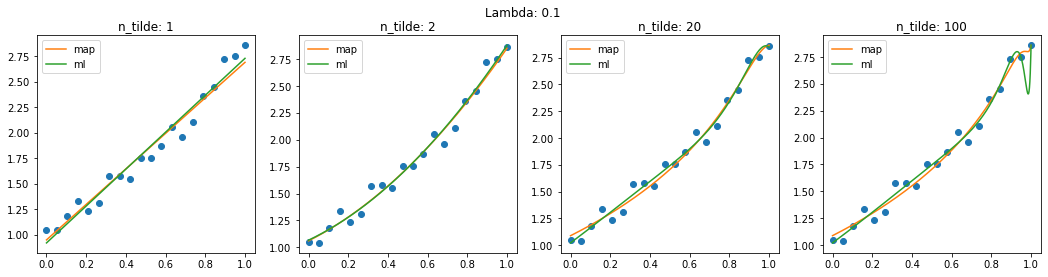

Relative Error MAP  0.7195318804302068 0.09710610260999156 0.37811612674418965 0.3758365423638112
Relative Error ML  0.7447387165797709 0.08937631822526469 0.6880974084930396 0.7467780784059208


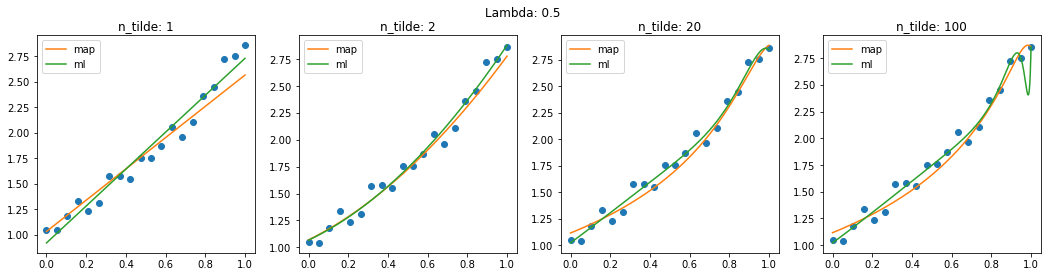

Relative Error MAP  0.6548806163153662 0.13691515538518248 0.41975488913415354 0.4175813670173779
Relative Error ML  0.7447387165797709 0.08937631822526469 0.6880974084930396 0.7467780784059208


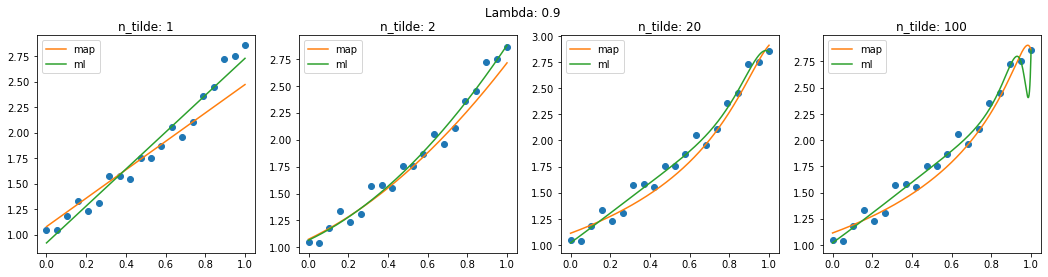

Relative Error MAP  0.6221716220716177 0.16441987407928 0.4404166671114762 0.4411180309624306
Relative Error ML  0.7447387165797709 0.08937631822526469 0.6880974084930396 0.7467780784059208


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from utils import backtracking
import matplotlib.patches as patches

np.random.seed(42)

def vander(m,n, x):
    
    X = np.ones((m,n))
    
    for i in range(1,n):
        X[:,i] = x**i
    
    return X



# The gradient_descent implementation.
def gradient_descent(f, grad_f, x0, kmax, tolf, tolx, backtrack=True, alpha = 0.1):

    def cond1(x_0, x_actual, grad_f, tolf):
        return (np.linalg.norm(grad_f(x_actual), 2) < tolf*( np.linalg.norm(grad_f(x_0), 2)))
    def cond2(x_previous, x_actual, tolx):
        return np.linalg.norm(np.linalg.norm(x_actual - x_previous, 2) < tolx)

    # Initialization
    k = 0
    
    x = np.zeros((kmax, np.size(x0)))
    f_val = np.zeros((kmax))
    grads = np.zeros((kmax, np.size(x0)))
    err = np.zeros((kmax))
    
    # Assign the values for the first iteration
    x[k, :] = x0
    f_val[k] = f(x0)
    grads[k, :] = grad_f(x0)
    err[k] = np.linalg.norm(grads[k, :], 2)
    
    # Choose step size
    if (backtrack):
        alpha = backtracking.backtracking(f, grad_f, x[0, :])
        
    # Handle the condition for the first iteration
    x[-1, :] = np.ones((np.size(x[0,:]), ))
    
    # Start the iterations
    while (((not(cond1(x[0,:], x[k,:], grad_f, tolf))) or (not(cond2(x[k-1,:], x[k,:], tolx)))) and (k < kmax-1)):
        # Update the value of x
        x[k+1, :] = x[k, :] - (alpha*grads[k, :])
        
        # Update the step size alpha
        if (backtrack):
            alpha = backtracking.backtracking(f, grad_f, x[k+1, :])
        
        # Update the values the the actual iteration
        k = k+1
        f_val[k] = f(x[k, :])
        grads[k, :] = grad_f(x[k, :])
        err[k] = np.linalg.norm(grads[k, :], 2)
    
    # Truncate the vectors that are (eventually) too long
    f_val = f_val[:k+1]
    grads = grads[:k+1, :]
    err = err[:k+1]
    x = x[:k+1]
    '''
    print("Backtracking: ",backtrack)
    if (not backtrack):
        print("Alpha: ",alpha)
    print("Local minimum found: " + str(x[k]))
    print("Iterations performed: " + str(k))
    print("_________________")
    '''
    
    return x, k, f_val, grads, err




def map_and_ml(Lambda, n_tilde):
    
    global A
    
    n_tilde0 = n_tilde[0]
    n_tilde1 = n_tilde[1]
    n_tilde2 = n_tilde[2]
    n_tilde3 = n_tilde[3]
    
    np.random.seed(42)
    #polynomial degree
    n = 2

    #number of samples
    N = 20

    x = np.linspace(0, 1, num=N)
    X = vander(N, n+1, x)

    w_true = np.ones(n+1)

    y = X @ w_true

    #building whie noise
    n_ = np.random.normal(0, 0.1, N)

    #adding white noise to dataset
    y_tilde = y + n_

    X_tilde = vander(N, n_tilde0+1, x)


    A = X_tilde

    b = y_tilde

    ### funzione input ML ###

    def f(x):
        return 0.5 * np.linalg.norm(A@x - b, 2) ** 2

    def grad_f(x):
        return A.T@(A@x - b)
    
    x0 = np.zeros((n_tilde0+1, ))
    x1 = np.zeros((n_tilde1+1, ))
    x2 = np.zeros((n_tilde2+1, ))
    x3 = np.zeros((n_tilde3+1, ))
    kmax = 10000
    tol = 1e-7

    ## run per diversi n_tilde
    
    w_ml0, k1, f_val1, grads1, err1 = gradient_descent(f, grad_f, x0, kmax, tol, tol)
    
    A = vander(N, n_tilde1+1, x)
    
    w_ml1, k2, f_val2, grads2, err2 = gradient_descent(f, grad_f, x1, kmax, tol, tol)
    
    A = vander(N, n_tilde2+1, x)
    
    w_ml2, k3, f_val3, grads3, err3 = gradient_descent(f, grad_f, x2, kmax, tol, tol)
    
    A = vander(N, n_tilde3+1, x)
    
    w_ml3, k4, f_val4, grads4, err4 = gradient_descent(f, grad_f, x3, kmax, tol, tol)
 
    w_ml0 = w_ml0[k1,:]
    w_ml1 = w_ml1[k2,:]
    w_ml2 = w_ml2[k3,:]
    w_ml3 = w_ml3[k4,:]

    ### funzione input MAP ###
    


    def f1(x):
        return f(x) + (Lambda/2)*np.linalg.norm(x,2)**2

    def grad_f1(x):
        return grad_f(x) + Lambda*x


    A = vander(N, n_tilde0+1, x)
    
    w_map5, k5, f_val5, grads5, err5 = gradient_descent(f1, grad_f1, x0, kmax, tol, tol)
    
    A = vander(N, n_tilde1+1, x)
    
    w_map6, k6, f_val6, grads6, err6 = gradient_descent(f1, grad_f1, x1, kmax, tol, tol)
    
    A = vander(N, n_tilde2+1, x)
    
    w_map7, k7, f_val7, grads7, err7 = gradient_descent(f1, grad_f1, x2, kmax, tol, tol)
    
    A = vander(N, n_tilde3+1, x)
    
    w_map8, k8, f_val8, grads8, err8 = gradient_descent(f1, grad_f1, x3, kmax, tol, tol)
    
    w_map5 = w_map5[k5,:]
    w_map6 = w_map6[k6,:]
    w_map7 = w_map7[k7,:]
    w_map8 = w_map8[k8,:]

    #change noise to 0.2, 0.3
    #plot a graph plotting datapoints and functions obtained and tell how map is better than ml

    x_fine = np.linspace(0,1,1000)
    fig, axs = plt.subplots(1, 4,figsize=(18,4))
    fig.suptitle("Lambda: " + str(Lambda))
    axs[0].plot(x,y_tilde,'o')
    axs[0].plot(x_fine, np.polyval(w_map5[::-1],x_fine),label='map')
    axs[0].plot(x_fine, np.polyval(w_ml0[::-1],x_fine), label='ml')
    axs[0].title.set_text("n_tilde: "+str(n_tilde0))
    axs[0].legend()
    
    axs[1].plot(x,y_tilde,'o')
    axs[1].plot(x_fine, np.polyval(w_map6[::-1],x_fine),label='map')
    axs[1].plot(x_fine, np.polyval(w_ml1[::-1],x_fine), label='ml')
    axs[1].title.set_text("n_tilde: "+str(n_tilde1))
    axs[1].legend()
    
    axs[2].plot(x,y_tilde,'o')
    axs[2].plot(x_fine, np.polyval(w_map7[::-1],x_fine),label='map')
    axs[2].plot(x_fine, np.polyval(w_ml2[::-1],x_fine), label='ml')
    axs[2].title.set_text("n_tilde: "+str(n_tilde2))
    axs[2].legend()
    
    axs[3].plot(x,y_tilde,'o')
    axs[3].plot(x_fine, np.polyval(w_map8[::-1],x_fine),label='map')
    axs[3].plot(x_fine, np.polyval(w_ml3[::-1],x_fine), label='ml')
    axs[3].title.set_text("n_tilde: "+str(n_tilde3))
    axs[3].legend()
    
    
    plt.show()
    
    def adjust_length(v1, v2):
    
        if (len(v1) > len(v2)):
            c = np.zeros((len(v1)))
            c[:len(v2)] += v2  
            d = v1.copy()
        elif (len(v1) < len(v2)):
            c = v2.copy()
            d = np.zeros((len(v2)))
            d[:len(v1)] += v1 
        else: 
            c = v2.copy()
            d = v1.copy()
            
        return d, c
            
    w_t, w_e = adjust_length(w_true, w_map5)
    w_t1, w_e1 = adjust_length(w_true, w_map6)
    w_t2, w_e2 = adjust_length(w_true, w_map7)
    w_t2_, w_e2_ = adjust_length(w_true, w_map8)
    
    w_t3, w_e3 = adjust_length(w_true, w_ml0)
    w_t4, w_e4 = adjust_length(w_true, w_ml1)
    w_t5, w_e5 = adjust_length(w_true, w_ml2)
    w_t5_, w_e5_ = adjust_length(w_true, w_ml3)
    
    
    
    
    relative_err1 = (np.linalg.norm(w_t-w_e))/np.linalg.norm(w_t)
    relative_err2 = (np.linalg.norm(w_t1-w_e1))/np.linalg.norm(w_t1)
    relative_err3 = (np.linalg.norm(w_t2-w_e2))/np.linalg.norm(w_t2)
    relative_err3_ = (np.linalg.norm(w_t2_-w_e2_))/np.linalg.norm(w_t2_)
    
    relative_err4 = (np.linalg.norm(w_t3-w_e3))/np.linalg.norm(w_t3)
    relative_err5 = (np.linalg.norm(w_t4-w_e4))/np.linalg.norm(w_t4)
    relative_err6 = (np.linalg.norm(w_t5-w_e5))/np.linalg.norm(w_t5)
    relative_err6_ = (np.linalg.norm(w_t5_-w_e5_))/np.linalg.norm(w_t5_)
    
    print("Relative Error MAP ", relative_err1, relative_err2, relative_err3, relative_err3_)
    print("Relative Error ML ", relative_err4, relative_err5, relative_err6, relative_err6_)
    #plt.plot(x,X_tilde@w_ml)
    #plt.plot(x,X_tilde@w_map)

n_tilde = [1, 2, 20, 100]    

map_and_ml(0.1, n_tilde)
map_and_ml(0.5, n_tilde)
map_and_ml(0.9, n_tilde)

***
As we can see, lower the dimension chosen for n_tilde, rawer the model: with $n_{tilde} = 1$ we can observe the model represented as a straight line (linear model), this is a quite poor model (because even though that the noise in the altered data is not too high, none between MAP and ML can get near the majority of the points) but with $n_{tilde} = 2$ we get a parable that better fits the data without overfitting. With $n_{tilde} = 20$ we get a model that in the case of ML results overfitted (as noticeable from the part of the graph in the top right corner), while in the case of MAP we don't have overfit thanks to the regularization parameter, which at the same time generates some parameters slightly far from the solution. In the case $n_{tilde} = 100$ both of the models result overfitted (top right corner), because the model chosen is just too complex. Increasing lambda makes MAP going far from the datapoints and with $n_{tilde} = 100$ doesn't even save us from overfitting
***

### So, the key is choosing the right values (not too big, not too small) for $\alpha$ and $n_{tilde}$

# Probabilistic Methods to Approximate Mathematical Constants
- Plot a circle of radius $r=0.5$, enclosed by a square with dimensions $l=1$. $$ $$ Generate a large number $N_{total}$ of uniformly distributed random points and plot them. These points can be in any position within the square. If they fall within the circle, plot them as red points, otherwise colour them as blue points. $$ $$ Define the variable $g=\frac{l^2}{r^2}\frac{N_{inter}}{N_{total}}$, where $N_{inter}$ is the number of points within the circle, $N_{total}$ is the total number of points. $$ $$ For increasing values $N_{total}$, which is the famous mathematical constant approximated by $g$? Compare them varying the number of $Ntotal$.

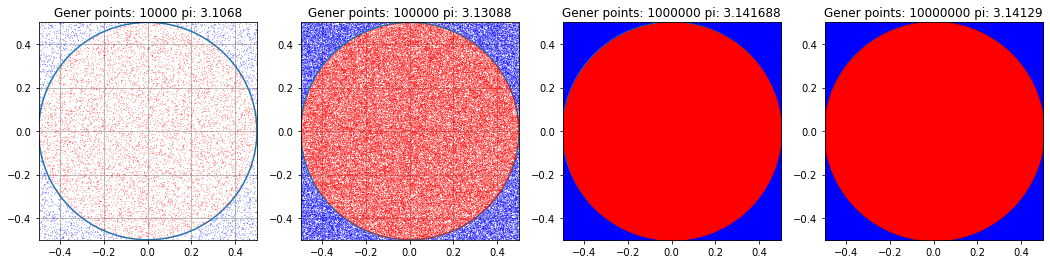

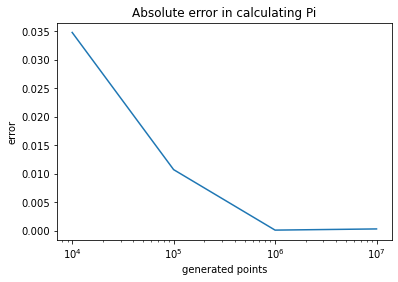

In [28]:

#this implementation verifies if a point p(x,y) is in a circle of radius r
def circle_verify(x,y,r):
    if (x**2 + y**2 <= r**2):
        return True
    else:
        return False

    
def montecarlo(radius, npoints, x_fine2):
    # circle
    np.random.seed(0)
    data = np.zeros((npoints,2))

    #generate random points in square
    data[:,0] = np.random.uniform(-radius,radius,npoints)
    data[:,1] = np.random.uniform(-radius,radius,npoints)

    red_data = []
    blue_data = []


    for i in range(0,npoints):
        if circle_verify(data[i,0], data[i,1], radius):
            red_data.append(data[i])
        else:
            blue_data.append(data[i])

    red_data = np.matrix(red_data)
    blue_data = np.matrix(blue_data)

    inpoints = red_data.shape[0]
    allpoints = data.shape[0]
    
    g = (((radius*2)**2)*inpoints)/((radius**2)*allpoints)
    
    return red_data, blue_data, g    
    
def draw_points_circle(radius, npoints1, npoints2, npoints3, npoints4):
    
        
    x_fine2 = np.linspace(0, 2 * np.pi, 100)
    
    red_data1, blue_data1, g1 = montecarlo(radius, npoints1, x_fine2) 
    red_data2, blue_data2, g2 = montecarlo(radius, npoints2, x_fine2)
    red_data3, blue_data3, g3 = montecarlo(radius, npoints3, x_fine2)
    red_data4, blue_data4, g4 = montecarlo(radius, npoints4, x_fine2)
    
    fig, axs = plt.subplots(1, 4,figsize=(18,4))
    
    
    axs[0].axis('equal')
    axs[0].axis([-0.5, 0.5, -0.5, 0.5])
    axs[0].title.set_text("Gener points: "+str(npoints1)+ " pi: "+str(g1))
    axs[0].plot(blue_data1[:,0],blue_data1[:,1],'o',color='blue',markersize=0.1)
    axs[0].plot(radius*np.cos(x_fine2), radius*np.sin(x_fine2))
    axs[0].plot(red_data1[:,0],red_data1[:,1],'o', color='red', markersize=0.1)
    axs[0].grid()
    
    axs[1].axis('equal')
    axs[1].axis([-0.5, 0.5, -0.5, 0.5])
    axs[1].title.set_text("Gener points: "+str(npoints2)+ " pi: "+str(g2))
    axs[1].plot(blue_data2[:,0],blue_data2[:,1],'o',color='blue',markersize=0.1)
    axs[1].plot(radius*np.cos(x_fine2), radius*np.sin(x_fine2))
    axs[1].plot(red_data2[:,0],red_data2[:,1],'o', color='red', markersize=0.1)
    axs[1].grid()
    
    axs[2].axis('equal')
    axs[2].axis([-0.5, 0.5, -0.5, 0.5])
    axs[2].title.set_text("Gener points: "+str(npoints3)+ " pi: "+str(g3))
    axs[2].plot(blue_data3[:,0],blue_data3[:,1],'o',color='blue',markersize=0.1)
    axs[2].plot(radius*np.cos(x_fine2), radius*np.sin(x_fine2))
    axs[2].plot(red_data3[:,0],red_data3[:,1],'o', color='red', markersize=0.1)
    axs[2].grid()
    
    axs[3].axis('equal')
    axs[3].axis([-0.5, 0.5, -0.5, 0.5])
    axs[3].title.set_text("Gener points: "+str(npoints4)+ " pi: "+str(g4))
    axs[3].plot(blue_data4[:,0],blue_data4[:,1],'o',color='blue',markersize=0.1)
    axs[3].plot(radius*np.cos(x_fine2), radius*np.sin(x_fine2))
    axs[3].plot(red_data4[:,0],red_data4[:,1],'o', color='red', markersize=0.1)
    axs[3].grid()
    
    plt.show()
    
    plt.plot([npoints1, npoints2, npoints3, npoints4],[abs(g1-np.pi),abs(g2-np.pi),abs(g3-np.pi),abs(g4-np.pi)])
    plt.title("Absolute error in calculating Pi")
    plt.xlabel('generated points')
    plt.ylabel('error')
    plt.xscale("log")
    
    plt.show()

draw_points_circle(0.5, 10000, 100000, 1000000, 10000000)

The number obtained is $\pi$ and its representation becomes more and more precise as we increase the number of points randomly "shot" in the square. This method is an example of Montecarlo method, a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. The underlying concept is to use randomness to solve problems that might be deterministic in principle.

  The area of the circle is $A_{circle} = \pi r^2$,
  The area of the square is $A_{square} = (2r)^2 = 4r^2$.
  
  
  If we divide the area of the circle, by the area of the square we get $\frac{\pi}{4}$.

The same ratio can be used between the number of points within the square and the number of points within the circle.

Hence we can use the following formula to estimate Pi:

π ≈ 4 x (number of points in the circle / total number of points)

$g=\frac{l^2}{r^2}\frac{N_{inter}}{N_{total}}=\frac{{(2r)}^2}{r^2}\frac{N_{inter}}{N_{total}} = \frac{4r^2}{r^2}\frac{N_{inter}}{N_{total}} = 4\frac{N_{inter}}{N_{total}} $